In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Other import
import sys


from sklearn.preprocessing import StandardScaler

In [122]:
# Extract data
data = pd.read_csv("./data/project_train.csv")
inputs = data.iloc[:,:11]
labels = data.iloc[:,11]
inputs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.545,0.884,5,-4.807,0,0.367,0.290000,0.000000,0.370,0.641,86.049
1,0.795,0.545,7,-8.153,1,0.343,0.003960,0.000000,0.273,0.809,91.967
2,0.489,0.871,5,-5.825,1,0.386,0.002850,0.000004,0.130,0.341,117.431
3,0.539,0.931,4,-1.803,0,0.262,0.000713,0.000000,0.204,0.685,85.571
4,0.918,0.734,11,-2.832,0,0.269,0.029400,0.000008,0.191,0.608,97.044


In [123]:
from sklearn.model_selection import train_test_split

# Scale data
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

# Split training and test data
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, random_state=1)

In [124]:
# Create the model
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [125]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [126]:
history = model.fit(inputs_train, labels_train, epochs=60, validation_split=0.3)

Epoch 1/60


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 43ms/step - loss: 0.7259 - accuracy: 0.4078 - val_loss: 0.6823 - val_accuracy: 0.5492
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.4965 - val_loss: 0.6599 - val_accuracy: 0.5984
Epoch 3/60
9/9 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.5674 - val_loss: 0.6409 - val_accuracy: 0.7049
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 0.6472 - accuracy: 0.6348 - val_loss: 0.6243 - val_accuracy: 0.7295
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 0.6284 - accuracy: 0.6596 - val_loss: 0.6096 - val_accuracy: 0.7541
Epoch 6/60
9/9 [==============================] - 0s 10ms/step - loss: 0.6122 - accuracy: 0.6738 - val_loss: 0.5966 - val_accuracy: 0.7705
Epoch 7/60
9/9 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.6950 - val_loss: 0.5847 - val_accuracy: 0.7705
Epoch 8/60
9/9 [==========================

Epoch 60/60
9/9 [==============================] - 0s 11ms/step - loss: 0.4122 - accuracy: 0.8227 - val_loss: 0.4545 - val_accuracy: 0.8115


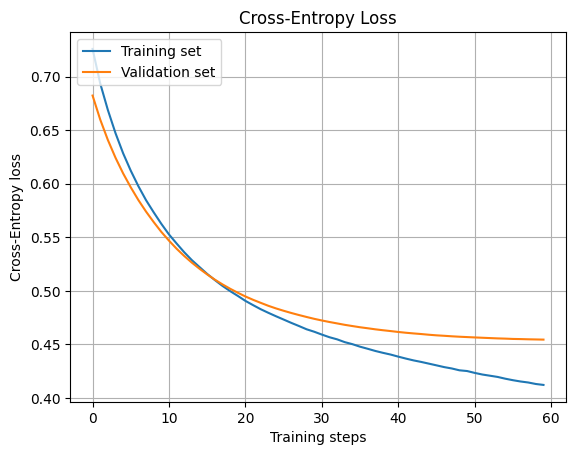

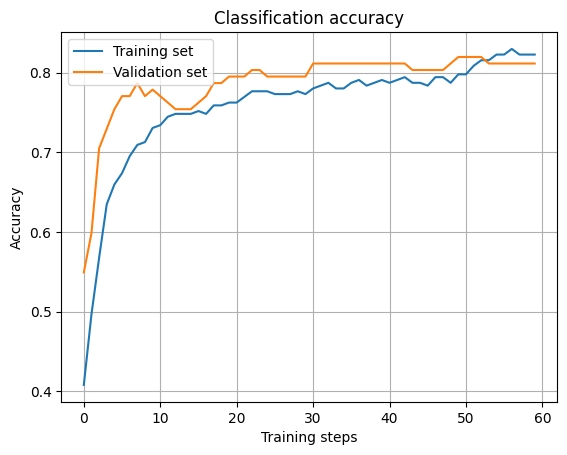

In [134]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Training set")
plt.plot(loss_val_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Cross-Entropy Loss")
plt.grid()
plt.xlabel("Training steps")
plt.ylabel("Cross-Entropy loss")
plt.show()

plt.plot(acc_curve, label="Training set")
plt.plot(acc_val_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Classification accuracy")
plt.grid()
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.show()

In [129]:
loss, acc = model.evaluate(inputs_test, labels_test)
print("Test loss", loss)
print("Train accuracy", acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8218
Test loss 0.4343087077140808
Train accuracy 0.8217821717262268


In [3]:
# If you decomment the next line, you will replace our NN with 82.17 % accuracy with new trained one
#model.save("./Saved_Model/2_hidd_layer_NN.h5")

In [4]:
# Predicting data for production

# Extract data
test_inputs = pd.read_csv("./data/project_test.csv")
test_inputs.head()

# Load the saved NN model
saved_model = tf.keras.models.load_model("./Saved_Model/2_hidd_layer_NN.h5")

# Predict labels 
prediction = saved_model.predict(test_inputs)
predicted_labels = np.argmax(prediction,axis=1)

#  Save the results
np.savetxt("./Predictions/label_prediction_NN.csv",[predicted_labels],delimiter=",",fmt="%d")

3/3 [==============================] - 0s 0s/step
